<center><h1>Pandas Visualizations and Grid Charts</h1></center>

<h2>1. Traffic Congestions in Sao Paulo</h2>
<br>
<div><p>We focused on exploratory data visualization and learned the following:</p>
<ul>
<li>How to visualize time series data with line plots.</li>
<li>How to visualize correlations with scatter plots.</li>
<li>How to visualize frequency distributions with bar plots and histograms.</li>
</ul>
<p>We'll continue learning about exploratory data visualization:</p>
<ul>
<li>How to speed up our exploratory data visualization workflow using Pandas.</li>
<li>How to better compare graphs using grid charts.</li>
</ul>
<p>We'll work with a data set about the urban traffic in São Paulo, the most populous city in Brazil. When it comes to traffic congestion, São Paulo is one of the most congested cities in the world.</p>
<p>Traffic jams can be as long as 100 km, and it can take people more than two hours to get to work. The city even has an air-taxi service for those who can afford it.</p>
<p></p><center>
<img src="m4_1.png" alt="img">
</center><p></p>
<p>Traffic jams cause significant loss. Instead of working, people are stuck in traffic wasting fuel, which leads to more air pollution, ultimately impacting human health. According to the <a href="https://www.worldbank.org/en/news/feature/2014/05/01/changing-commuter-choices-helps-sao-paulo-reduce-traffic-congestion" target="_blank">World Bank</a>, São Paulo's traffic jams were estimated to cost <span>$</span>17.8 billion dollars in 2012.</p>
</div>

<h2>2. Traffic Behavior Dataset</h2>
<br>

<h3>Exercise</h3>
<br>
<div><ol>
<li>Import the <code>pandas</code> module as <code>pd</code>.</li>
<li>Read in the <code>traffic_sao_paulo.csv</code> file using <code>pd.read_csv()</code>.<ul>
<li>The data points are separated by <code>;</code>, so you'll need to use <code>sep=';'</code> to read in the file properly.</li>
<li>Assign the result to a variable named <code>traffic</code>.</li>
</ul>
</li>
<li>Perform a quick examination of the dataset.<ul>
<li>Inspect the first and the last five rows.</li>
<li>Use <code>DataFrame.info()</code> to print summary information about the dataset. Do you see any missing values? Are all data types numerical?</li>
</ul>
</li>
</ol></div>

In [4]:
import pandas as pd

In [5]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')

In [6]:
traffic.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [7]:
traffic.tail()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"
134,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"12,1"


In [8]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

<h2>3. Slowness in Traffic</h2>
<br>

In [9]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')

In [10]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

<h3>Exercise</h3>
<br><ol>
<li>Import <code>matplotlib.pyplot</code>, and plot a histogram for the <code>Slowness in traffic (%)</code> column</li>
<li>Based on the histogram, evaluate the truth value of the sentences below.<ul>
<li>The distribution of <code>Slowness in traffic (%)</code> is right skewed. Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>Most of the values pile up on the left side of the histogram. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>Most of the values are over 15.0%. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
</ul>
</li>
</ol>

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

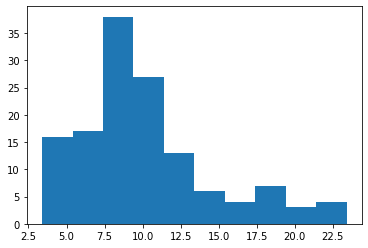

In [14]:
plt.hist(traffic['Slowness in traffic (%)'], bins=10)
plt.show()

In [15]:
sentence_1 = True
sentence_2 = True
sentence_3 = False

<h2>4. Pandas Visualization Methods</h2>
<br>

<h3>Exercise</h3>
<br>
<ol>
<li>Use the <code>Series.plot.hist()</code> method to generate a histogram for the <code>Slowness in traffic (%)</code> column.</li>
<li>Add the title <code>Distribution of Slowness in traffic (%)</code> (the answer checking is case-sensitive).</li>
<li>Add the x-label <code>Slowness in traffic (%)</code>.</li>
<li>Display the plot using <code>plt.show()</code>.</li>
</ol>

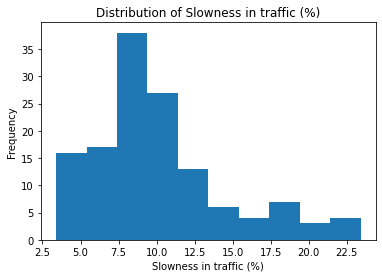

In [17]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

<h2>5. Frequency of Incidents</h2>
<br>
<div><p>So far, we've examined the distribution of the <code>Slowness in traffic (%)</code> column. Recall that our goal here is to determine the factors that worsen the traffic slowness in São Paulo.</p>
<p>With the exception of the <code>Hour (Coded)</code> and <code>Slowness in traffic (%)</code> columns, all the columns describe incident types related to traffic slowness: immobilized buses, broken trucks, accidents with victims, fire, manifestations, etc.</p>
<p>Each one of these columns records the number of incidents reported at the time of registering the data. If we sum all the values in a column, we can get the total number of incidents that happened between December 14, 2009 and December 18, 2009 — from Monday to Friday.</p>
<p>For instance, we see there were 118 broken truck incidents:</p>
</div>

In [18]:
traffic['Broken Truck'].sum()

118

<div>
<p>Let's calculate the sums for all the incident columns so we can compare them (we start with isolating the incident columns by dropping the columns <code>'Hour (Coded)'</code> and <code>'Slowness in traffic (%)'</code>).</p>
</div>

In [19]:
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)
incidents.sum()

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64

<div>
<p>It's not easy to compare all these numbers just by eyeballing the table that <code>incidents.sum()</code> returned. It's better if we use a bar plot to visualize the values.</p>
<p>Before we generate the bar plot, let's make the observation that <code>incidents.sum()</code> returns a Pandas <code>Series</code>:</p>
</div>

In [20]:
type(incidents.sum())

pandas.core.series.Series

<div>
<p>This means that we can use the <code>Series.plot.bar()</code> method we mentioned on the previous screen:</p>
</div>

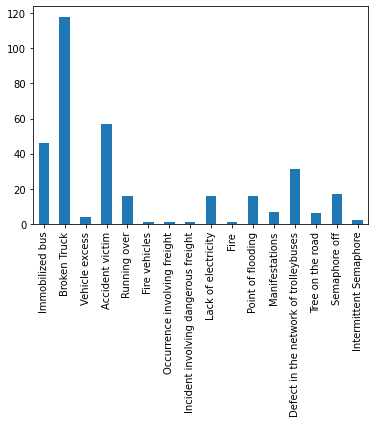

In [21]:
incidents.sum().plot.bar()
plt.show()

<p>One of the first things we notice is that the x-tick labels are very hard to read — we need to tilt our head to the left to be able to read anything.</p>

<h3>Exercise</h3>
<br>
<ol>
<li>Generate a horizontal bar plot for the <code>incidents.sum()</code> table.</li>
</ol>

In [33]:
incidents.sum().sort_values(ascending=False)

Broken Truck                             118
Accident victim                           57
Immobilized bus                           46
Defect in the network of trolleybuses     31
Semaphore off                             17
Running over                              16
Lack of electricity                       16
Point of flooding                         16
Manifestations                             7
Tree on the road                           6
Vehicle excess                             4
Intermittent Semaphore                     2
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Fire                                       1
dtype: int64

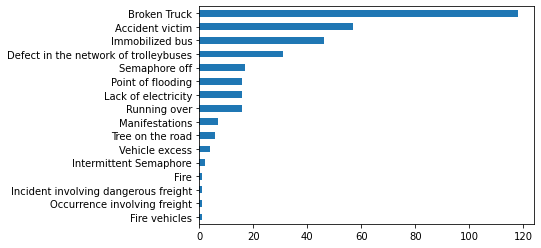

In [31]:
incidents.sum().sort_values().plot.barh()
plt.show()

<ol start="2">
<li>Based on the resulting bar plot, evaluate the truth value of the following sentences:<ul>
<li>Broken trucks are the most frequent cause of slow traffic. Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.
<div>
    <input type="radio" id="true1" value="true" name="ans1">
    <label for="true">True</label>
    <input type="radio" id="false1" value="false" name="ans1">
    <label for="false">False</label>
</div>
    </li>
<li>Lack of electricity and flooding are less frequent than broken trucks. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.
<div>
    <input type="radio" id="true1" value="true" name="ans2">
    <label for="true">True</label>
    <input type="radio" id="false1" value="false" name="ans2">
    <label for="false">False</label>
</div>
</li>
<li>The most frequent incident type is broken trucks. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.
<div>
    <input type="radio" id="true1" value="true" name="ans3">
    <label for="true">True</label>
    <input type="radio" id="false1" value="false" name="ans3">
    <label for="false">False</label>
</div>
</li>
</ul>
</li>
</ol>
    
    

In [ ]:
sentence_1 = False
sentence_2 = True
sentence_3 = True

<h2>6. Correlations with Traffic Slowness</h2>
<br>

<h3>Exercise</h3>
<br>
<div><p>Using the <code>DataFrame.plot.scatter()</code> method:</p>
<ol>
<li>Generate a scatter plot with <code>Slowness in traffic (%)</code> on the x-axis and <code>Point of flooding</code> on the y-axis. Close and display the plot using <code>plt.show()</code>.</li>
<li>Generate a scatter plot with <code>Slowness in traffic (%)</code> on the x-axis and <code>Semaphore off</code> on the y-axis.</li>
</ol></div>

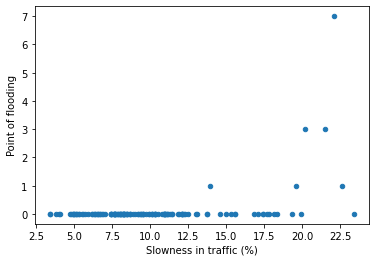

In [34]:
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Point of flooding',
                    )
plt.show()

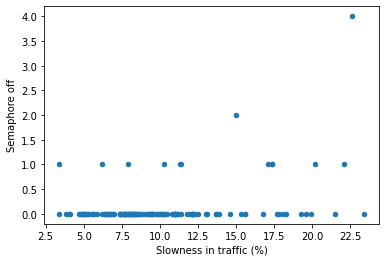

In [35]:
traffic.plot(x='Slowness in traffic (%)',
             y='Semaphore off',
             kind='scatter'
            )
plt.show()

<h2>7. Traffic Slowness Over 20%</h2>
<br>
<div><p>On the previous cells, we looked up a few correlation values and generated three scatter plots. We identified lack of electricity, flooding, and nonfunctional semaphores as potential factors worsening the traffic.</p>
<p>To look for more evidence, we're going to isolate all the rows where traffic slowness is 20% or more. Then, we're going to calculate and visualize the incident frequency.</p>
</div>

<h3>Exercise</h3>
<br>
<ol>
<li>Isolate all the rows where traffic slowness is 20% or more. Assign the new <code>DataFrame</code> to a variable named <code>slowness_20_or_more</code>.</li>
<li>Drop the <code>Slowness in traffic (%)</code> and <code>Hour (Coded)</code> columns from <code>slowness_20_or_more</code>.</li>
<li>Calculate the event frequencies using the <code>DataFrame.sum()</code> method on <code>slowness_20_or_more</code>. Assign the resulting <code>Series</code> to <code>incident_frequencies</code>.</li>
<li>Use <code>incident_frequencies</code> to plot a horizontal bar plot — use a Pandas method.</li>
<li>Examine the plot — what are some high-frequency incidents when traffic slowness is 20% or more?</li>
</ol>

In [39]:
slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20]

In [40]:
slowness_20_or_more.columns

Index(['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)'],
      dtype='object')

In [ ]:
slowness_20_or_more.drop(labels=['Hour (Coded)', 'Slowness in traffic (%)'],
                         axis=1,
                         inplace=True,
                        )

In [43]:
slowness_20_or_more.columns

Index(['Immobilized bus', 'Broken Truck', 'Vehicle excess', 'Accident victim',
       'Running over', 'Fire vehicles', 'Occurrence involving freight',
       'Incident involving dangerous freight', 'Lack of electricity', 'Fire',
       'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore'],
      dtype='object')

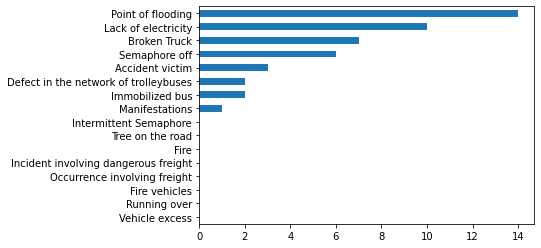

In [45]:
incident_frequencies = slowness_20_or_more.sum()
incident_frequencies.sort_values().plot.barh()
plt.show()

<h2>8. How Traffic Slowness Change</h2>
<br>
<h3>Exercise</h3>
<br>

<h2>9. Comparing Graphs</h2>
<br>
<h3>Exercise</h3>
<br>

<h2>10. Grid Charts</h2>
<br>
<h3>Exercise</h3>
<br>

<h2>11. Grid Charts (II)</h2>
<br>
<h3>Exercise</h3>
<br>

<h2>12. Grid Charts (III)</h2>
<br>
<h3>Exercise</h3>
<br>